This notebook shows an example of how to run the training for an autoencoder.

In [1]:
import torch
from torch.utils.data import DataLoader

from autoencoder import Network
from datasets import BinarizedVOCDataset, GAUSSIAN_BLUR
from training import TRAIN_CONFIGS, train_val, get_device

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Load Dataset

In [2]:
train_dataset   = BinarizedVOCDataset(image_set = 'train', augmentations = GAUSSIAN_BLUR )
val_dataset     = BinarizedVOCDataset(image_set = 'val',   augmentations = []) 

train_loader  = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True) 
val_loader    = DataLoader(val_dataset, batch_size=64, shuffle=False, drop_last=True)

# BCE

Training run id: 1702246222	 Epochs:[1-5]


  0%|          | 0/5 [00:00<?, ?it/s]

Train Batch: [10/89]	Avg Batch Loss: 0.695633


Train Batch: [20/89]	Avg Batch Loss: 0.693940


Train Batch: [30/89]	Avg Batch Loss: 0.671033


Train Batch: [40/89]	Avg Batch Loss: 0.636276


Train Batch: [50/89]	Avg Batch Loss: 0.604708


Train Batch: [60/89]	Avg Batch Loss: 0.574180


Train Batch: [70/89]	Avg Batch Loss: 0.546154


Train Batch: [80/89]	Avg Batch Loss: 0.523285


100%|██████████| 90/90 [06:28<00:00,  4.31s/it]


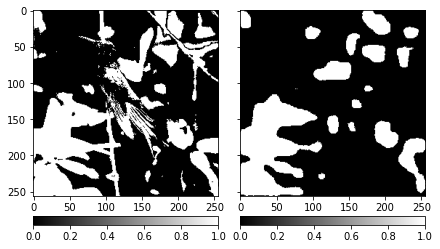

 20%|██        | 1/5 [17:34<1:10:16, 1054.12s/it]

Epoch: [1/5]	Train Loss: 0.5031	Test loss: 0.3876	Val accuracy: 0.8503
Saved model: models/model_v1_drop_p_0.5_BCE_thres_0.0_Adam_LR_0.001_s_0_1702246222_1.pth


Train Batch: [10/89]	Avg Batch Loss: 0.299014


Train Batch: [20/89]	Avg Batch Loss: 0.299058


Train Batch: [30/89]	Avg Batch Loss: 0.296558


Train Batch: [40/89]	Avg Batch Loss: 0.290653


Train Batch: [50/89]	Avg Batch Loss: 0.288294


Train Batch: [60/89]	Avg Batch Loss: 0.283056


Train Batch: [70/89]	Avg Batch Loss: 0.280004


Train Batch: [80/89]	Avg Batch Loss: 0.275395


100%|██████████| 90/90 [06:39<00:00,  4.44s/it]


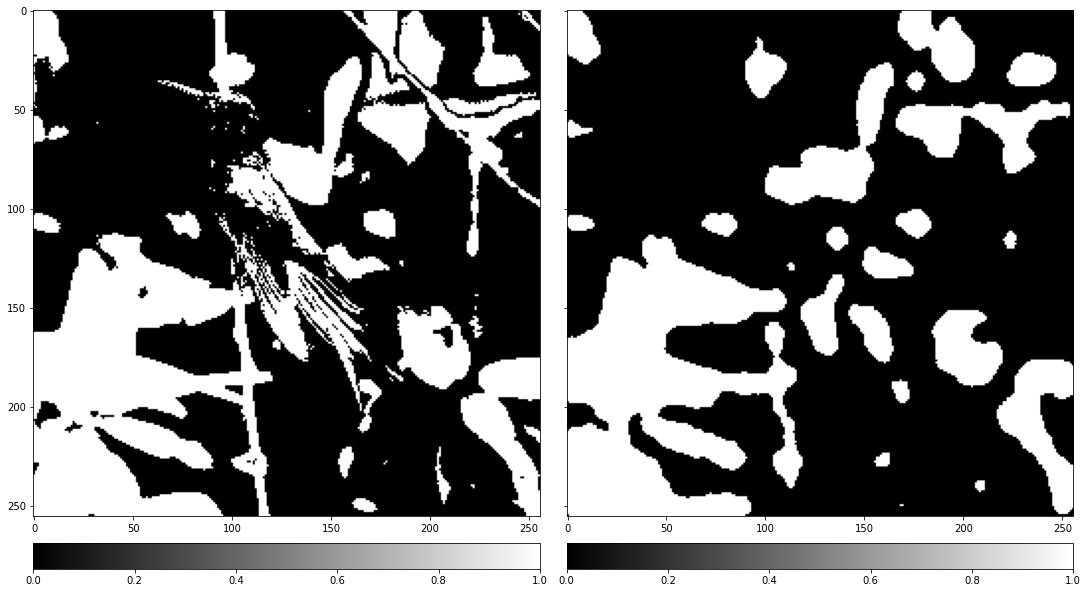

 40%|████      | 2/5 [36:05<54:22, 1087.58s/it]  

Epoch: [2/5]	Train Loss: 0.2722	Test loss: 0.3393	Val accuracy: 0.8710
Saved model: models/model_v1_drop_p_0.5_BCE_thres_0.0_Adam_LR_0.001_s_0_1702246222_2.pth


Train Batch: [10/89]	Avg Batch Loss: 0.235691


Train Batch: [20/89]	Avg Batch Loss: 0.233544


Train Batch: [30/89]	Avg Batch Loss: 0.230180


Train Batch: [40/89]	Avg Batch Loss: 0.231758


Train Batch: [50/89]	Avg Batch Loss: 0.228707


Train Batch: [60/89]	Avg Batch Loss: 0.224978


Train Batch: [70/89]	Avg Batch Loss: 0.222714


Train Batch: [80/89]	Avg Batch Loss: 0.220217


100%|██████████| 90/90 [06:51<00:00,  4.57s/it]


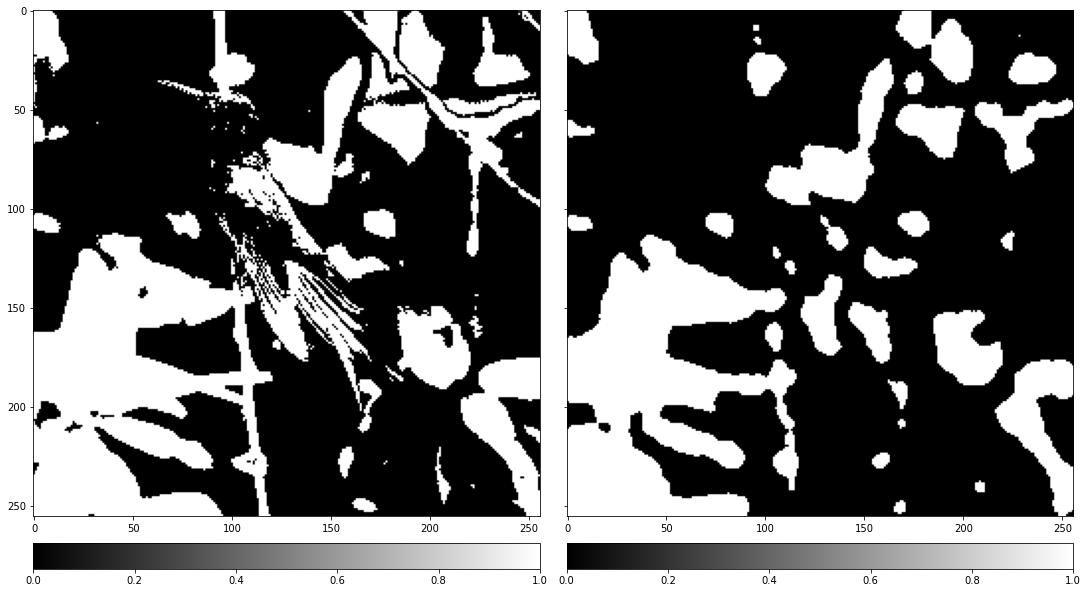

 60%|██████    | 3/5 [54:40<36:40, 1100.42s/it]

Epoch: [3/5]	Train Loss: 0.2196	Test loss: 0.3216	Val accuracy: 0.8738
Saved model: models/model_v1_drop_p_0.5_BCE_thres_0.0_Adam_LR_0.001_s_0_1702246222_3.pth


Train Batch: [10/89]	Avg Batch Loss: 0.204544


Train Batch: [20/89]	Avg Batch Loss: 0.209664


Train Batch: [30/89]	Avg Batch Loss: 0.207910


Train Batch: [40/89]	Avg Batch Loss: 0.208797


Train Batch: [50/89]	Avg Batch Loss: 0.207842


Train Batch: [60/89]	Avg Batch Loss: 0.208923


Train Batch: [70/89]	Avg Batch Loss: 0.208135


Train Batch: [80/89]	Avg Batch Loss: 0.205763


100%|██████████| 90/90 [06:54<00:00,  4.60s/it]


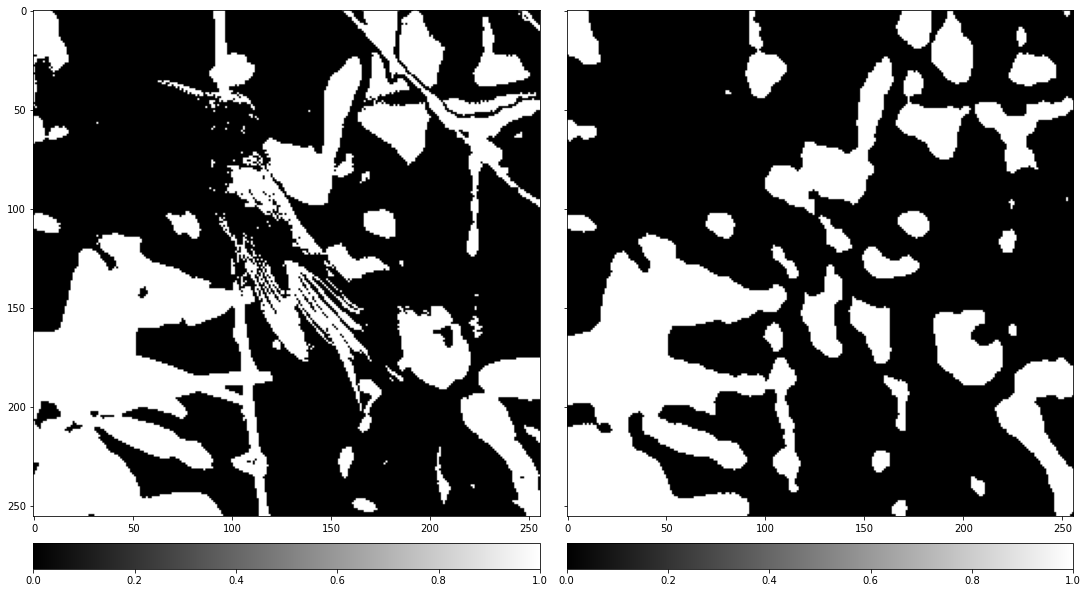

 80%|████████  | 4/5 [1:14:08<18:47, 1127.10s/it]

Epoch: [4/5]	Train Loss: 0.2042	Test loss: 0.2866	Val accuracy: 0.8801
Saved model: models/model_v1_drop_p_0.5_BCE_thres_0.0_Adam_LR_0.001_s_0_1702246222_4.pth


Train Batch: [10/89]	Avg Batch Loss: 0.192626


Train Batch: [20/89]	Avg Batch Loss: 0.189949


Train Batch: [30/89]	Avg Batch Loss: 0.188698


Train Batch: [40/89]	Avg Batch Loss: 0.190910


Train Batch: [50/89]	Avg Batch Loss: 0.192206


Train Batch: [60/89]	Avg Batch Loss: 0.192711


Train Batch: [70/89]	Avg Batch Loss: 0.192169


Train Batch: [80/89]	Avg Batch Loss: 0.190896


100%|██████████| 90/90 [06:59<00:00,  4.67s/it]


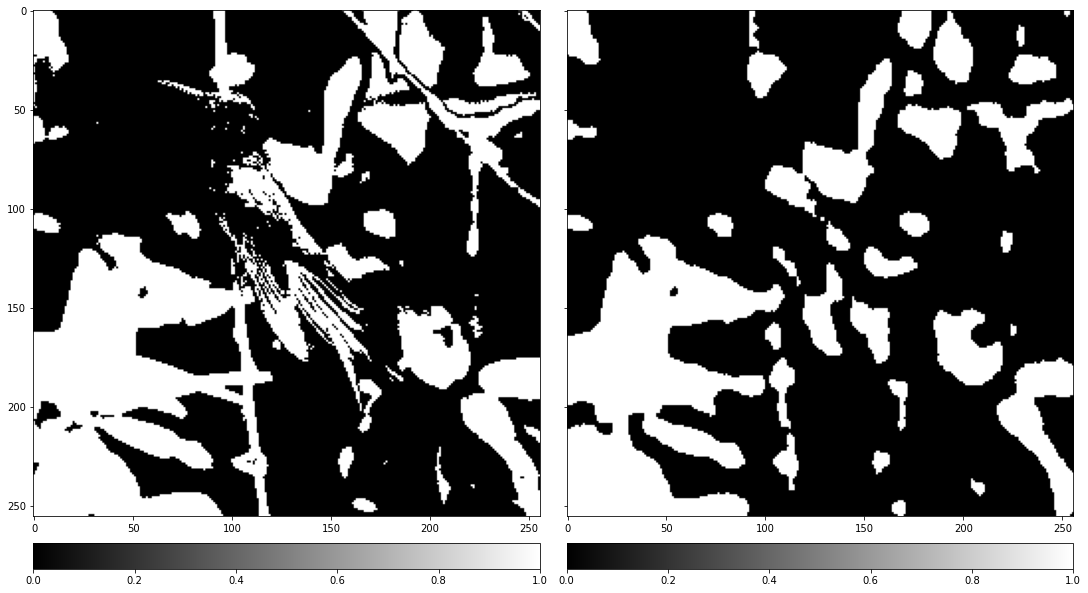

100%|██████████| 5/5 [1:33:31<00:00, 1122.25s/it]

Epoch: [5/5]	Train Loss: 0.1902	Test loss: 0.3020	Val accuracy: 0.8728
Saved model: models/model_v1_drop_p_0.5_BCE_thres_0.0_Adam_LR_0.001_s_0_1702246222_5.pth


In [3]:
LR            = [.001] 
DROP_P        = [.5]  
MODEL_VERSION = [1] 
SEED          = [0] 

device = get_device()

all_models = []
all_stats  = []

EPOCHS = 5

for config_key in TRAIN_CONFIGS.keys():
  if config_key == 'MSE':
    continue
  criterion_cls  = TRAIN_CONFIGS[config_key]['cls']
  pred_threshold = TRAIN_CONFIGS[config_key]['pred_threshold']
  for lr in LR: 
    for drop_prob in DROP_P:
      for version in MODEL_VERSION:
        for seed in SEED:
          model = Network(model_id = f'v{version}_drop_p_{drop_prob}_{config_key}_thres_{pred_threshold}_Adam_LR_{lr}_s_{seed}', drop_prob = drop_prob, version = version)
          model.to(device)
          criterion    = criterion_cls(reduction='mean')
          optimizer    = torch.optim.Adam(model.parameters(), lr = lr)
          stats        = []
          start_epoch  = 0
          epochs       = EPOCHS
          model, stats = train_val( model, 
                                    train_loader,
                                    val_loader, 
                                    criterion, 
                                    optimizer, 
                                    epochs, 
                                    start_epoch    = start_epoch, 
                                    stats          = stats,
                                    pred_threshold = pred_threshold,
                                    seed           = seed,
                                    device         = device,
                                    show_batch     = 10,
                                    run_id         = None) #To be setup if continuing a previous run

          all_models.append(model)
          all_stats.append(stats)